# PyTorch로 시작하는 딥러닝 입문
https://wikidocs.net/book/2788
## 01. 자연어 처리 전처리 이해하기
요즘 자연어처리는 머신러닝에서 주로 사용, 딥러닝에서는 lstm이나 transform사용
### 1. 토근화

In [10]:
en_text = 'A Dog Run back corner near spare bedrooms'

#### 1. spacy 사용하기
- pip install spacy
- python -m spacy download en 영어 패키지 다운
- 독일어 de 스페인어 es 포르투갈어 pt 프랑스어 fr 이탈리아어 it 네덜란드어 nl 멀티랭귀지 xx

In [11]:
import spacy
spacy_en = spacy.load('en_core_web_sm')

In [12]:
def tokenize(en_text):
    return [tok.text for tok in spacy_en.tokenizer(en_text)]

In [13]:
print(tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


#### 2. NLTK 사용하기
- pip install nltk

In [14]:
import nltk
from nltk.tokenize import word_tokenize

In [15]:
nltk.download('punkt')
print(word_tokenize(en_text))

[nltk_data] Downloading package punkt to /Users/limkahyun/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


#### 3. 띄어쓰기로 토큰화
- 영어는 띄어쓰기로 토근화해도 단어들 간 구분이 명확함
- 한국어는 조사, 접사 등으로 나눠진 단어가 다른 단어로 인식되거 단어 집합이 불필요하게 커짐
- 단어 집합 : 중복을 제거한 텍스트의 총 단어 집합(set)

In [16]:
print(en_text.split())

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


#### 4. 한국어 형태소 토근화
한국어는 보편적으로 **형태소분석기**로 토큰화 함  
형태소 분석기 중에서 mecab 사용  
mecab 설치 총정리 : https://magicode.tistory.com/62

In [1]:
kor_text = '사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어'
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


In [5]:
from konlpy.tag import Mecab
tokenizer = Mecab()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이', '라는', '글', '을', '봤', '어', '.', '그래서', '오늘', '사과', '를', '먹', '으려고', '했', '는데', '사과', '가', '썩', '어서', '슈퍼', '에', '가', '서', '사과', '랑', '오렌지', '사', '왔', '어']


### 2. 단어 집합 생성

In [7]:
import urllib.request
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt') # 데이터프레임에 저장
data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [11]:
# 임의로 100개 저장
sample_data = data[:100]

# 정규표현식으로 데이터 정제 : 한글과 공백 제외하고 모두 제거
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-하-ㅣ가-힣]", " ")
sample_data

<ipython-input-11-9abd05252c1f>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-하-ㅣ가-힣]", " ")
<ipython-input-11-9abd05252c1f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-하-ㅣ가-힣]", " ")


,id,document,label
0,8112052,어릴때보고지금다시봐도재밌어요ㅋㅋ,1
1,8132799,디자인을배우는학생으로외국디자이너와그들이일군전통을통해발전해가는문화산업이부러웠는데사실우...,1
2,4655635,폴리스스토리시리즈는부터뉴까지버릴께하나도없음최고,1
3,9251303,와연기가진짜개쩔구나지루할거라고생각했는데몰입해서봤다그래이런게진짜영화지,1
4,10067386,안개자욱한밤하늘에떠있는초승달같은영화,1
...,...,...,...
95,3908729,진짜최고다최고성룡형님마이우상,1
96,6318878,당신이좋아하는장르는뭐요이영화에도저영화에도이런장르는싫다니원,1
97,2620222,지금까지본영화중에최고다,1
98,5954450,매회리타가자꾸거슬려서죽었으면좋겠다고생각했는데ㅠㅠ죄책감에나도잠못이룬다,1


In [14]:
# 불용어 정의
stopwords = ['을','의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [15]:
tokenizer = Mecab()
tokenized = []

for sentence in sample_data['document']:
    # 토큰화
    temp = tokenizer.morphs(sentence)
    
    # 불용어 제거
    temp = [word for word in temp if not word in stopwords]
    
    tokenized.append(temp)
    
print(tokenized[:10])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '배우', '학생', '외국', '디자이너', '그', '일군', '전통', '통해', '발전', '해', '문화', '산업', '부러웠', '는데', '사실', '우리', '나라', '에서', '그', '어려운', '시절', '끝', '까지', '열정', '지킨', '노라노', '같', '전통', '있', '어', '저', '같', '사람', '꿈', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '감사', '합니다'], ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'], ['연기', '진짜', '개', '쩔', '구나', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화'], ['사랑', '해', '본', '사람', '라면', '처음', '부터', '끝', '까지', '웃', '수', '있', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '나오', '나요', '나오', '면', '빠', '로', '보', '고', '싶', '음'], ['굿'], ['바보', '아니', '라', '병', '쉰', '인', '듯']]


In [17]:
# 단어를 key, 빈도수가 value로 저장됨
vocab = FreqDist(np.hstack(tokenized))
print('단어 집합 크기 :', len(vocab))
print('감동이라는 단어가 작성 된 횟수 : ', vocab['감동'])

단어 집합 크기 : 655
감동이라는 단어가 작성 된 횟수 :  7


In [18]:
# 빈도수 높은 상위 500개 단어 추출
vocab_size = 500
vocab = vocab.most_common(vocab_size)
print('단어 집합 크기 :', len(vocab))

단어 집합 크기 : 500


### 3. 각 단어에 고유한 정수 부여
- enumerate(): 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 인덱스를 순차적으로 함께 리턴
- 인덱스 0, 1은 다른 용도로 남겨두고
- 단어들에 대해 2~501까지 순차적으로 인덱스 부여

In [20]:
word_to_index = {word[0] : index +2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

In [21]:
encoded = []
for line in tokenized: # 입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: # 각 줄에서 1개씩 글자를 읽음
        try:
            temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
        except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체
            temp.append(word_to_index['unk']) # unk의 인덱스로 변환:0
            
    encoded.append(temp)
    
print(encoded[:10])

[[77, 24, 7, 4, 46, 37, 78, 21, 25, 79], [184, 80, 185, 186, 187, 47, 188, 111, 189, 190, 22, 112, 191, 192, 11, 48, 81, 113, 26, 47, 193, 114, 115, 27, 194, 195, 196, 13, 111, 6, 61, 49, 13, 38, 197, 198, 4, 199, 14, 6, 82, 39, 200, 83], [201, 116, 202, 50, 203, 27, 204, 205, 84, 12, 28, 9], [51, 29, 117, 206, 207, 208, 209, 62, 40, 30, 11, 210, 118, 15, 2, 211, 63, 8, 29, 3, 31], [212, 213, 214, 215, 6, 216, 13, 3], [119, 22, 32, 38, 120, 121, 50, 115, 27, 85, 14, 6, 3], [122, 33, 217, 37, 78, 33], [117, 218, 52, 219, 52, 64, 220, 34, 7, 4, 41, 28], [53], [221, 86, 87, 222, 223, 54, 88]]


### 4. 길이가 다른 문장들을 모두 동일한 길이로 바꿔주는 패딩
- 패딩: 길이가 다른 리뷰들을 모두 동일한 길이로 바꿔주는 작업
- 위에서 설정한 'pad'를 추가하여 작업

리뷰의 최대 길이 : 61
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 13.260000


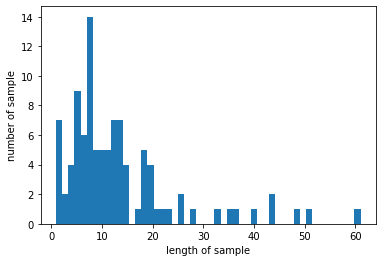

In [22]:
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [24]:
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해준 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 나머지는 전부 'pad' 토큰으로 채운다.
        
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
print(encoded[:3])

리뷰의 최대 길이 : 61
리뷰의 최소 길이 : 61
리뷰의 평균 길이 : 61.000000
[[77, 24, 7, 4, 46, 37, 78, 21, 25, 79, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [184, 80, 185, 186, 187, 47, 188, 111, 189, 190, 22, 112, 191, 192, 11, 48, 81, 113, 26, 47, 193, 114, 115, 27, 194, 195, 196, 13, 111, 6, 61, 49, 13, 38, 197, 198, 4, 199, 14, 6, 82, 39, 200, 83, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [201, 116, 202, 50, 203, 27, 204, 205, 84, 12, 28, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


- 단어들을 고유 정수로 변환 완료
- 각 정수를 고유한 단어 벡터 변환 작업 필요
    - 원-핫인코딩
    - 워드 임베딩 (주로 사용)

## 02. 토치텍스트는 잘 사용하지 않음

In [2]:
# pip install torchtext==0.9.0
from torchtext.legacy.data import TabularDataset
import urllib.request
import pandas as pd

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")
df = pd.read_csv('IMDb_Reviews.csv', encoding='latin1')
df

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0
...,...,...
49995,the people who came up with this are SICK AND ...,0
49996,"The script is so so laughable... this in turn,...",0
49997,"""So there's this bride, you see, and she gets ...",0
49998,Your mind will not be satisfied by this noÂbu...,0


In [4]:
print('전체 샘플의 개수 : {}'.format(len(df)))
train_df = df[:25000]
test_df = df[25000:]

전체 샘플의 개수 : 50000


## 03. NLP에서 원핫인코딩

에러 : No JVM shared library file (libjli.dylib) found. Try setting up the JAVA_HOME environment variable properly.  
해결 : https://muten.tistory.com/13
- 자바 설치 : https://www.oracle.com/java/technologies/downloads/#java8-mac
- 자바 위치 확인 : cd /Library/Java/JavaVirtualMachines ls
- ~/.zshrc 환경변수 설정  
    sudo nano ~/.zshrc  
    export JAVA_HOME=/Library/Java/JavaVirtualMachines/본인자바버전/Contents/Home  
    export PATH=(달러)JAVA_HOME/bin:(달러)PATH

In [1]:
# conda activate sona
# conda install -c conda-forge jpype1
# pip install konlpy

In [3]:
from konlpy.tag import Okt

okt = Okt()
token = okt.morphs('나는 자연어 처리를 배운다')
print(token)

['나', '는', '자연어', '처리', '를', '배운다']


In [4]:
word2index = {}

for voca in token:
    if voca not in word2index.keys():
        word2index[voca] = len(word2index)
        
print(word2index)

{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [8]:
one_hot_vector = [0]*(len(word2index))
one_hot_vector[1]

0

In [9]:
# 원핫인코딩
def one_hot_encoding(word, word2index):
    one_hot_vector = [0]*(len(word2index)) # 0으로 이루어진 벡터 만들기
    index = word2index[word]               # 입력 문자에 해당하는 인덱스 추출
    one_hot_vector[index] = 1              # 벡터 중 해당 인덱스만 1로 변경
    return one_hot_vector

In [10]:
one_hot_encoding("자연어",word2index)

[0, 0, 1, 0, 0, 0]

## 04. 워드 임베딩
- 원핫인코딩 : 단어들간의 유사성을 판단하기 어렵다는 단점
- 워드임베딩 : 단어를 밀집 표현으로 변환하는 방법
**원핫인코딩의 유사성 비교**

In [11]:
import torch

In [12]:
# 원-핫 벡터 생성
dog = torch.FloatTensor([1, 0, 0, 0, 0])
cat = torch.FloatTensor([0, 1, 0, 0, 0])
computer = torch.FloatTensor([0, 0, 1, 0, 0])
netbook = torch.FloatTensor([0, 0, 0, 1, 0])
book = torch.FloatTensor([0, 0, 0, 0, 1])

print(torch.cosine_similarity(dog, cat, dim=0))
print(torch.cosine_similarity(cat, computer, dim=0))
print(torch.cosine_similarity(computer, netbook, dim=0))
print(torch.cosine_similarity(netbook, book, dim=0))

tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)


**밀집표현**  
1만개의 단어가 있을 때 '강아지'라는 단어는 [0 0 0 1 0 0 0 ...] 과 같이 9999개의 0과 1개의 1로 구성된 1만차원으로 표현된다.  
하지만 밀집표현을 사용하고 사용자가 원하는 차원을 설정해준다면 모든 단어의 벡터표현은 사용저 설정 차원으로 바뀌면서 구성되는 값 역시 0과1이 아닌 실수로 변경된다.  
이 때 벡터의 차원이 조밀해졌다고 하여 밀집벡터라고 한다.

**워드임베딩**  
단어를 밀집벡터의 형태로 표현하는 방법을 워드임베딩이라고 한다.  
밀집벡터가 워드임베딩 과정을 통해 나온 결과를 임베딩벡터라고 한다.  
워드 임베딩 방법론으로 LSA, Word2Vec, FastText, Glove등이 있다.  
파이토치에서는 nn.embedding()은 위 방법론을 사용하지는 않지만 단어를 랜덤한 밀집벡터로 변환한 후에 가중치 학습과 같은 방식으로 단어벡터를 학습하는 방법을 사용한다.

## 05. 워드투벡터(Word2Vec)
**희소표현**  
단어의 원-핫 인코딩을 통한 원-핫 벡터는 0과1로만 이루어진 희소 벡터다.  
이 때 단어간 유사성을 표현할 수 없다는 단점이 있다.  
단어의 '의미'를 다차원 공간에 벡터화하는 방법을 분산표현(disributed representation)이라 한다.  

**분산표현**
비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다는 분포 가설 하에 만들어진 표현 방법이다.  
위에서 '강아지'라는 단어는 [0 0 0 1 0 0 0 ...]과 같이 9999개의 0과 1개의 1로 구성된 1만차원이었다면,  
분산표현에서는 [0.2, 0.3, 0.5, 0.2 ...]과 같이 실수형의 값을 가지게 된다.  
이러한 표현 방법으로는 단어 간 유사도를 계산할 수 있다.

**CBOW(Continuous Bag of Wards)**  
워드투벡터에는 CBOW, Skip-Gram 두가지 방식이 있다.  
- CBOW : 주변에 있는 단어들을 가지고 중간에 있는 단어 예측
- Skip-Gram : 중간에 있는 단어로 주변 단어 예측
슬라이딩 윈도우를 통해 중심단어와 그 주변단어를 학습한다.
윈도우 크기가 1이면 중심단어 주변으로 1칸씩, 윈도우 크기가 2면 중심단어 주변으로 2칸씩 학습한다.  

## 06. 글로브(GloVe) 
## 07. PyTorch의 nn.Embedding()
glove는 2020년 이후 버전 업데이트가 안되었고, nn.Embedding()은 단어 처리에서 사용되는 경우만 설명되어있어서  
pytorch 입문 책의 9단원은 건너뛰고 10단원 순환신경망(RNN)으로 진행